In [3]:
x = [1,2,3,4,5]

In [7]:
for i in x:
    print(i**2)
x

1
4
9
16
25


[1, 2, 3, 4, 5]

In [8]:
sorted_sq =[0 for _ in x]
sorted_sq
    

[0, 0, 0, 0, 0]

In [ ]:
for idx in range(len(array)):
    value = array[idx]
    

In [1]:
import numpy as np

In [22]:

z = np.random.random((4,5))
z

array([[0.06310333, 0.59443848, 0.79249473, 0.27413368, 0.37101981],
       [0.85311454, 0.67872892, 0.75437746, 0.41725723, 0.32089873],
       [0.37229637, 0.27535218, 0.6795556 , 0.58162645, 0.97019879],
       [0.41550704, 0.33048907, 0.96671416, 0.82589904, 0.30540018]])

In [19]:
np.random.seed(2021)
y = np.random.random((6,5))
y

array([[0.60597828, 0.73336936, 0.13894716, 0.31267308, 0.99724328],
       [0.12816238, 0.17899311, 0.75292543, 0.66216051, 0.78431013],
       [0.0968944 , 0.05857129, 0.96239599, 0.61655744, 0.08662996],
       [0.56127236, 0.61652471, 0.96384302, 0.57430429, 0.37116085],
       [0.45214524, 0.20185025, 0.56930512, 0.19509597, 0.58370402],
       [0.47631347, 0.5178144 , 0.82309863, 0.73222503, 0.06905627]])

# DataFrame

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.DataFrame({
    'key' : ['A','B','C','A','B','C'],
    'value1' : range(6),
    'value2' : np.random.randint(0, 100, 6)
})

In [4]:
df

,key,value1,value2
0,A,0,26
1,B,1,56
2,C,2,2
3,A,3,2
4,B,4,47
5,C,5,17


In [7]:
df.groupby('key').aggregate(['min', np.median, np.mean, max])

value1                 value2                 
       min median mean max    min median  mean max
key                                               
A        0    1.5  1.5   3      2   14.0  14.0  26
B        1    2.5  2.5   4     47   51.5  51.5  56
C        2    3.5  3.5   5      2    9.5   9.5  17

In [8]:
df.groupby('key').aggregate({
    'value1' : 'min',
    'value2' : 'max'
})

,value1,value2
key,,
A,0,26
B,1,56
C,2,17


# Filter

In [18]:
df.groupby('key').std()

,value1,value2
key,,
A,2.12132,16.970563
B,2.12132,6.363961
C,2.12132,10.606602


In [11]:
def filter_func(x):
    return x['value2'].std()>7

In [13]:
df.groupby('key').filter(filter_func)

,key,value1,value2
0,A,0,26
2,C,2,2
3,A,3,2
5,C,5,17


# Transform

In [17]:
df.groupby('key').transform(lambda x: x - x.mean())

,value1,value2
0,-1.5,12.0
1,-1.5,4.5
2,-1.5,-7.5
3,1.5,-12.0
4,1.5,-4.5
5,1.5,7.5


# Apply

In [31]:
def norm_by_col2(x):
    x['value1'] = x['value1']/x['value2'].sum()
    return x

In [38]:
df.groupby('key').apply(norm_by_col2)

,key,value1,value2
0,A,0.000000,26
1,B,0.009709,56
2,C,0.105263,2
3,A,0.107143,2
4,B,0.038835,47
5,C,0.263158,17


# División de datos por columnas

In [40]:
L = [0,1,0,1,2,0]
print(df)
df.groupby(L).sum()

  key  value1  value2
0   A       0      26
1   B       1      56
2   C       2       2
3   A       3       2
4   B       4      47
5   C       5      17


,value1,value2
0,7,45
1,4,58
2,4,47


In [42]:
df.groupby('key').sum()

,value1,value2
key,,
A,3,28
B,5,103
C,7,19


In [44]:
df.groupby(df['key']).sum()

,value1,value2
key,,
A,3,28
B,5,103
C,7,19


In [45]:
df2 = df.set_index('key')
df2

,value1,value2
key,,
A,0,26
B,1,56
C,2,2
A,3,2
B,4,47
C,5,17


In [46]:
mapping = {
    'A': 'vowel',
    'B': 'consonant',
    'C': 'consonant'
}

In [48]:
df2.groupby(mapping).sum()

,value1,value2
consonant,12,122
vowel,3,28


In [49]:
df2.groupby(str.lower).sum()

,value1,value2
a,3,28
b,5,103
c,7,19


In [51]:
df2.groupby([str.lower, mapping]).sum()

,,value1,value2
a,vowel,3,28
b,consonant,5,103
c,consonant,7,19


# Gráficos desde data frames y exportacion

In [57]:
years = [year for year in range(1900,2021)]
deads = [(y + np.random.uniform(0,100) -1850) for y in years]

In [58]:
df = pd.DataFrame({
    "year": years,
    "deads": deads
})

In [59]:
df.head()

,year,deads
0,1900,137.628600
1,1901,132.796143
2,1902,56.713867
3,1903,124.410099
4,1904,141.293426


<AxesSubplot:xlabel='year', ylabel='deads'>

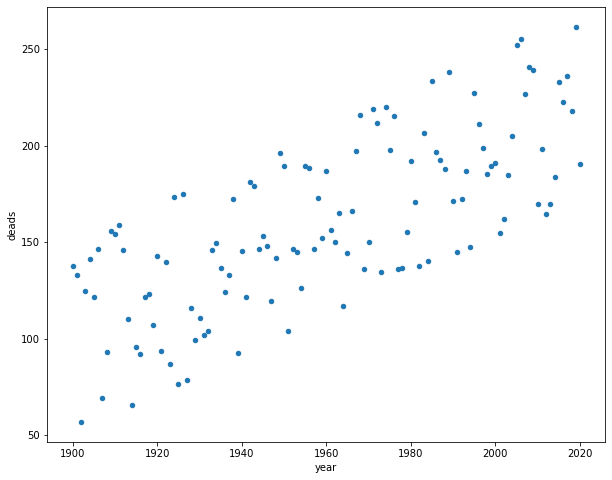

In [65]:
df.plot(x="year", y="deads", figsize = (10,8), kind="scatter")

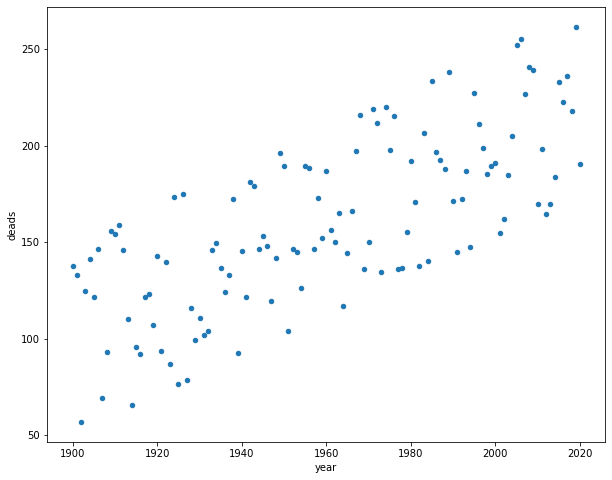

In [66]:
my_plot = df.plot(x="year", y="deads", figsize = (10,8), kind="scatter")

In [67]:
my_fig = my_plot.get_figure()

In [68]:
my_fig.savefig("data_frame_dig.png")